In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [6]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [7]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 19.9MB/s]


In [8]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [9]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [11]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
data.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [14]:
data2.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [15]:
data2.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [16]:
data_f = data2.loc[data2.team1.isin(['Delhi Capitals','Kings XI Punjab'])] 
data_f = data_f.loc[data_f.team2.isin(['Delhi Capitals','Kings XI Punjab'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
72,73,2008,Chandigarh,2008-04-27,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Kings XI Punjab,0,4,SM Katich,"Punjab Cricket Association Stadium, Mohali",RE Koertzen,I Shivram,NaN
99,100,2008,Delhi,2008-05-17,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
160,161,2009,Bloemfontein,2009-05-15,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,B Lee,OUTsurance Oval,HDPK Dharmasena,IL Howell,NaN
176,177,2010,Chandigarh,2010-03-13,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,G Gambhir,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN
217,218,2010,Delhi,2010-04-11,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Kings XI Punjab,0,7,PP Chawla,Feroz Shah Kotla,BF Bowden,AM Saheba,NaN
258,259,2011,Delhi,2011-04-23,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Delhi Capitals,29,0,DA Warner,Feroz Shah Kotla,S Asnani,RE Koertzen,NaN
292,293,2011,Dharamsala,2011-05-15,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Kings XI Punjab,29,0,PP Chawla,Himachal Pradesh Cricket Association Stadium,Asad Rauf,SL Shastri,NaN


Finally , We have got a complete dataset for all the matches of  KXIP VS DC

**Let's do Q1 now**

DC Wins - 10
KXIP Wins - 14


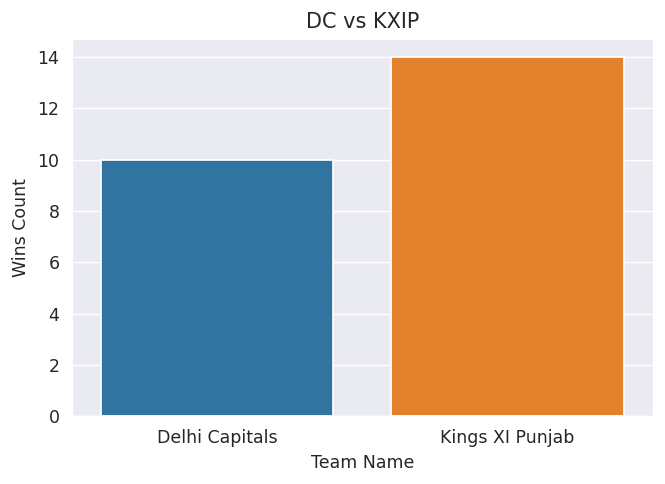

In [19]:
plt.figure(dpi=125)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('DC vs KXIP')
A,B =data_f.winner.value_counts()

print('DC Wins -',B)
print('KXIP Wins -',A)

plt.show()


Let's mark KXIP considering overall analysis

**Let's do Q2 now**

**Strike Rate of KL Rahul in first 6 overs v DC**

In [20]:
data_n = data.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_n = data_n.loc[data.batsman.isin(['KL Rahul'])]
data_n = data_n.loc[(data_n.over <=6)]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
94952,401,2,Royal Challengers Bangalore,Delhi Capitals,1,2,KL Rahul,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
94953,401,2,Royal Challengers Bangalore,Delhi Capitals,1,3,KL Rahul,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
94954,401,2,Royal Challengers Bangalore,Delhi Capitals,1,4,KL Rahul,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
94955,401,2,Royal Challengers Bangalore,Delhi Capitals,1,5,KL Rahul,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
94956,401,2,Royal Challengers Bangalore,Delhi Capitals,1,6,KL Rahul,CH Gayle,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173503,11328,1,Kings XI Punjab,Delhi Capitals,1,6,KL Rahul,CH Gayle,I Sharma,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
173504,11328,1,Kings XI Punjab,Delhi Capitals,2,1,KL Rahul,CH Gayle,S Lamichhane,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
173505,11328,1,Kings XI Punjab,Delhi Capitals,2,2,KL Rahul,CH Gayle,S Lamichhane,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
173506,11328,1,Kings XI Punjab,Delhi Capitals,2,3,KL Rahul,CH Gayle,S Lamichhane,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [26]:
data_n.batsman_runs.sum() # Rahul's Runs v DC in first 6 overs

133

In [29]:
data_n.over.value_counts()

1    25
2    17
3    15
4     7
5     5
6     4
Name: over, dtype: int64

In [25]:
balls = (25+17+15+7+5+4)
print(balls)  # Balls faced by Rahul in first 6 overs v DC

73


In [31]:
data_n.over.value_counts().sum() # Alternative way to count balls , verifying above results

73

In [24]:
np.round(133/73*100,2) # Strike Rate of Rahul v DC in first 6 overs

182.19

Let's mark 138+ there.

**For Q3, Let's find Iyer runs v KXIP and then the percentage with overall runs by DC**

In [37]:
data_c = data.loc[data.bowling_team.isin(['Kings XI Punjab'])]
data_c = data_c.loc[data.batting_team.isin(['Delhi Capitals'])]
data_c = data_c.loc[data.batsman.isin(['SS Iyer'])]
data_c.match_id.unique()

array([   15,    35,   528,   548,   583,  7895,  7915, 11149, 11328])

First let's find matches in which Iyer has played v KXIP

In [40]:
data_si = data.loc[data.bowling_team.isin(['Kings XI Punjab'])]
data_si = data_si.loc[data.batting_team.isin(['Delhi Capitals'])]
data_si = data_si.loc[data.match_id.isin([ '15','35','528','548','583','7895','7915','11149','11328'])]
data_si

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
3318,15,1,Delhi Capitals,Kings XI Punjab,1,1,SV Samson,SW Billings,Sandeep Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
3319,15,1,Delhi Capitals,Kings XI Punjab,1,2,SV Samson,SW Billings,Sandeep Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
3320,15,1,Delhi Capitals,Kings XI Punjab,1,3,SV Samson,SW Billings,Sandeep Sharma,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3321,15,1,Delhi Capitals,Kings XI Punjab,1,4,SV Samson,SW Billings,Sandeep Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
3322,15,1,Delhi Capitals,Kings XI Punjab,1,5,SV Samson,SW Billings,Sandeep Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173741,11328,2,Delhi Capitals,Kings XI Punjab,19,6,SS Iyer,S Rutherford,Mohammed Shami,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
173742,11328,2,Delhi Capitals,Kings XI Punjab,20,1,SS Iyer,S Rutherford,S Curran,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
173743,11328,2,Delhi Capitals,Kings XI Punjab,20,2,S Rutherford,SS Iyer,S Curran,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
173744,11328,2,Delhi Capitals,Kings XI Punjab,20,3,SS Iyer,S Rutherford,S Curran,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [41]:
data_si.total_runs.sum() # Runs scored v DC overall when Iyer has played

1316

In [42]:
data_si.match_id.nunique() # It should be 9 considering above analysis

9

In [43]:
# Now, let's find runs scored by Iyer v KXIP
data_si = data_si.loc[data.batsman.isin(['SS Iyer'])] 

In [46]:
data_si.batsman_runs.sum() # Runs by Iyer

253

In [48]:
np.round(253/1316*100,2) # Average combination of Iyer v KXIP 

19.22

Let's mark 18.1 % plus

**Let's do Q4**

**Let's find Wickets taken by KXIP's other bowlers in which Shami has played between 5th over and 20th over v DC**

In [55]:
data_k = data.loc[data.bowling_team.isin(['Kings XI Punjab'])]
data_k = data_k.loc[data.batting_team.isin(['Delhi Capitals'])]
data_k = data_k.loc[(data_k.over >=5) & (data_k.over<=20)]
data_k = data_k.loc[data.bowler.isin(['Mohammed Shami'])]
data_k.match_id.unique()

array([11149, 11328])

In [57]:
data_k.player_dismissed.value_counts()

H Vihari     1
RR Pant      1
AR Patel     1
CH Morris    1
C Ingram     1
Name: player_dismissed, dtype: int64

Shami has taken 4 wickets in 5 to 20 overs when he played

Now, Let's find overall wickets taken by Punjab v DC in 5-20 overs when he has played

In [58]:
data_p = data.loc[data.bowling_team.isin(['Kings XI Punjab'])]
data_p = data_p.loc[data.batting_team.isin(['Delhi Capitals'])]
data_p = data_p.loc[(data_p.over >=5) & (data_p.over<=20)]
data_p = data_p.loc[data.match_id.isin(['11149','11328'])]

In [59]:
data_p.player_dismissed.value_counts()

S Dhawan        2
RR Pant         2
C Ingram        2
HV Patel        1
SS Iyer         1
H Vihari        1
S Lamichhane    1
K Rabada        1
AR Patel        1
CH Morris       1
Name: player_dismissed, dtype: int64

In [61]:
data_p.player_dismissed.value_counts().sum() # Total wickets in 5-20 overs of DC v KXIP when Shami has played

13

It's clear from above that we need to subtract 4 from 13 i.e 9.

In [63]:
np.round(9/2,2) # Our required answer

4.5

Let's mark 5+ considering our analysis 

**Let's do Q5 now**

**Let's find Gayle's not out status and his strike rate v DC as a KXIP Player**

In [70]:
data_g = data.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_g = data_g.loc[data.batsman.isin(['CH Gayle'])]

In [72]:
data_g.match_id.nunique() # Matches played by Gayle v DC

14

In [74]:
data_g.player_dismissed.value_counts().sum() # How many times Gayle has dismissed

11

In [75]:
data_g.batsman_runs.sum() # Runs v DC

452

In [76]:
data_g.over.value_counts().sum() # Balls faced v DC

301

In [77]:
np.round(452/301*100,2) # Strike rate of Gayle v DC

150.17

Let's mark out and 130+ considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

